In [1]:
!pip install numpy
!pip install pandas
!pip install transformers


In [2]:
import numpy as np 
import pandas as pd 


df = pd.read_csv('datasetV2.csv')
df.head()

,ID,Summary,Reviews per Month
0,16976743,Charming yet Trendy Retreat- in my 2 bedroom w...,1.02
1,6556848,Grab your friends and make this two bedroom Br...,0.44
2,240918,A private bedroom in a shared apartment. One b...,1.96
3,4759718,"BEFORE BOOKING: PRIVATE rental only, June to A...",0.25
4,2591213,Beautiful private room on the garden/basement...,2.33


In [3]:

df = df.sample(frac=0.04, random_state=42)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from transformers import BertPreTrainedModel, BertModel, BertTokenizer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import torch

'''
# Check if GPU is available
if torch.cuda.is_available():
    # Set the default tensor type to CUDA tensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.set_default_device(device)'''


/home/bob/anaconda3/envs/newenvn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n# Check if GPU is available\nif torch.cuda.is_available():\n    # Set the default tensor type to CUDA tensor\n    torch.set_default_tensor_type(torch.cuda.FloatTensor)\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\ntorch.set_default_device(device)'

In [5]:
import os
os.environ['TOKENIZERS_PARALLELISM']= "false"

In [6]:
df['SummaryClean']= df['Summary'].map(lambda x : str(x))

In [7]:
len(df.SummaryClean.tolist())

618

In [31]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [28]:
from scipy.special import softmax


0.9436973

In [36]:
scores = []
model.eval()
with torch.no_grad():

    for i in df.SummaryClean.tolist():
        feature = tokenizer([i], padding=True, max_length=512, truncation=True, return_tensors="pt")
        a = model(**feature)
        b = softmax(a.logits[0])[-1]
        scores.append(b)


In [35]:
scores

[0.9436973,
 0.232309,
 0.97261006,
 0.07927743,
 0.9895818,
 0.9267311,
 0.92704976,
 0.97837573,
 0.04858976,
 0.9318645,
 0.8912284,
 0.9849733,
 0.84495324,
 0.57160926,
 0.9222631,
 0.036056772,
 0.5349138,
 0.97529674]

In [37]:
scores[0]

0.9436973

In [ ]:
!pip install matplotlib

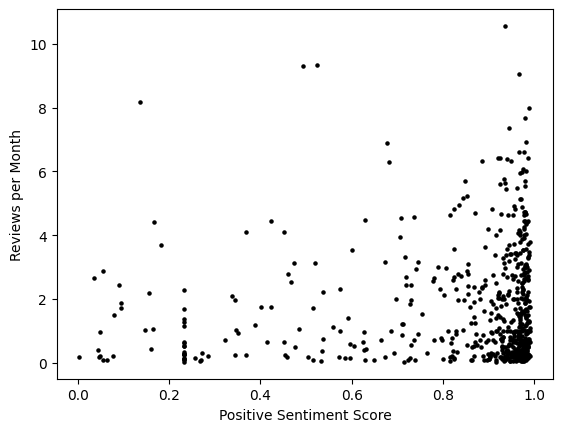

In [43]:
import matplotlib.pyplot as plt

# Create some sample data
x = df['Reviews per Month'].map(lambda x: float(x))
y_values = list(map(lambda x: float(x),scores))

# Plot the data
plt.scatter(y_values,x, s= 5, c="black")
plt.ylabel('some numbers')  # Add a label to the y-axis
plt.ylabel('Reviews per Month')  # Add a label to the y-axis
plt.xlabel('Positive Sentiment Score')
plt.show()  # Display the plot


In [41]:
import numpy as np
np.corrcoef(x,y_values)[0,1]

0.07422383902776304

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

config.json: 100%|██████████| 1.15k/1.15k [00:00<00:00, 3.33MB/s]
model.safetensors: 100%|██████████| 1.63G/1.63G [00:33<00:00, 49.1MB/s]
tokenizer_config.json: 100%|██████████| 26.0/26.0 [00:00<00:00, 83.6kB/s]
vocab.json: 100%|██████████| 899k/899k [00:00<00:00, 2.45MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 1.68MB/s]
tokenizer.json: 100%|██████████| 1.36M/1.36M [00:00<00:00, 2.95MB/s]


In [ ]:
sequence_to_classify = df.SummaryClean.to_numpy()[0]
candidate_labels = ['travel','fun', 'beach', 'house']
classifier(sequence_to_classify, candidate_labels,multi_label=True)

{'sequence': 'Just Steps to the Ocean! This lovely lower story duplex home was fully remodeled in May of 2011. It is located just 5 houses from the ocean with an ocean view patio area allowing you to fully enjoy the California lifestyle!',
 'labels': ['house', 'fun', 'beach', 'travel'],
 'scores': [0.9402497410774231,
  0.9278727769851685,
  0.7628886699676514,
  0.4482495188713074]}

In [ ]:
df.SummaryClean.to_numpy()[0]

'Just Steps to the Ocean! This lovely lower story duplex home was fully remodeled in May of 2011. It is located just 5 houses from the ocean with an ocean view patio area allowing you to fully enjoy the California lifestyle!'